### purpose

when comparing performance between models that differ only in the marker set used, is the difference in IBE between these marker sets correlated with the difference in performance?

In [1]:
from pythonimports import *

import MVP_summary_functions as mvp

import itertools as it
import seaborn as sns
plt.rcParams.update({'font.family' : 'serif'})

ibe_dir = '/work/lotterhos/MVP-Offsets/run_20220919/summaries/02_main_questions/10_ibe_vs_performance'

summarydir = '/home/b.lind/offsets/run_20220919/summaries'
figdir = makedir(f'{summarydir}/02_main_questions/12_ibe_marker_set_diffs')

t0 = dt.now()

mvp.latest_commit()
session_info.show()

#########################################################
Today:	October 31, 2023 - 12:24:50 EDT
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit 419895d157c97717f835390196c13cf973d25eba  
Merge: e20434f 1e09b6c  
Author: Brandon Lind <lind.brandon.m@gmail.com>

Current commit of MVP_offsets:
commit 782ee79eada654ce337935bf61a0984cd76dd9cf  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Wed Oct 4 14:13:12 2023 -0400
#########################################################



# get performance data

get median score across gardens for a given permutation

In [2]:
all_data = mvp.combine_level_dicts(
    use_bcs_data=False,
    keep_nuisance=False,
#         repdirs=['/home/b.lind/offsets/run_20220919_0-225']
    )

marker_data = {}
for marker_set in mvp.hue_order['marker_set']:
    marker_data[marker_set] = mvp.subset_data_scores(all_data.copy(), apply_median=True, marker_set=marker_set)

filtering criteria:
	use_bcs_data = False
	performance = garden_performance
	num_traits = None
	ntraits = None
	marker_set = None
	remove_structcrxn = False
	keep_nuisance = False
	remove_rda_outliers = True


reading reps: 100%|███████████████| 10/10 [00:25<00:00,  2.57s/it]


0-225
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


225-450
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


450-675
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


675-900
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


900-1125
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1125-1350
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1350-1575
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1575-1800
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1800-2025
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


2025-2250
	 RONA num seeds =  225
	 lfmm2 num seeds =  22

# get IBE data

In [3]:
ibe_anno = pd.read_table(f'{ibe_dir}/ibe_corrs_anno.txt')

ibe_anno['landscape-slevel'] = ibe_anno.landscape + '_' + ibe_anno.slevel.fillna('1-trait')

ibe_anno.head(2) 

,index,variable,value,landscape,glevel,pleio,slevel,popsize,migration,demography,final_LA_bin,final_LA,landscape-slevel
0,1231094,adaptive,0.928419,Est-Clines,highly-polygenic,no pleiotropy,NaN,N-cline-center-to-edge,m-constant,N-cline-center-to-edge_m-constant,0.42 < LA ≤ 0.58,0.500854,Est-Clines_1-trait
1,1231095,adaptive,0.724388,Est-Clines,highly-polygenic,no pleiotropy,NaN,N-cline-N-to-S,m-constant,N-cline-N-to-S_m-constant,0.42 < LA ≤ 0.58,0.505075,Est-Clines_1-trait


In [4]:
# each seed has three entries (one per marker set)
ibe_anno['index'].value_counts().unique()

array([3])

In [5]:
ibe_anno.iloc[0]['landscape-slevel']

'Est-Clines_1-trait'

In [6]:
ibe = ibe_anno[['variable', 'index', 'value']].pivot(index='variable', columns=['index'])
ibe.index.name = None
ibe.columns.name = None

ibe

value                                                    \
index      1231094   1231095   1231096   1231097   1231098   1231099   
adaptive  0.928419  0.724388  0.952396  0.963189  0.838841  0.654849   
all       0.907638  0.732075  0.971627  0.967951  0.839331  0.518723   
neutral   0.904934  0.737878  0.968654  0.962997  0.830187  0.486564   

                                                                      \
index      1231100   1231101   1231102   1231103   1231104   1231105   
adaptive  0.615601  0.842283  0.798687  0.549209  0.640068  0.538729   
all       0.514924  0.789537  0.627899  0.419513  0.518323  0.495138   
neutral   0.504292  0.782030  0.572302  0.385274  0.485665  0.477999   

                                                                      \
index      1231106   1231107   1231108   1231109   1231110   1231111   
adaptive  0.879719  0.763682  0.609248  0.673321  0.549446  0.654553   
all       0.816955  0.623024  0.510167  0.645403  0.509850  0.629566   
neutral   0.781068  0.579171  0.474933  0.638132  0.502415  0.620449   

                                                                      \
index      1231112   1231113   1231114   1231115   1231116   1231117   
adaptive  0.654239  0.636920  0.827337  0.682419  0.884929  0.923793   
all       0.624460  0.611237  0.757919  0.556366  0.865934  0.883421   
neutral   0.619119  0.601861  0.728521  0.522216  0.839371  0.844526   

                                                                      \
index      1231118   1231119   1231120   1231121   1231122   1231123   
adaptive  0.766868  0.547443  0.506620  0.703294  0.650147  0.571034   
all       0.689322  0.476378  0.402215  0.588422  0.552980  0.419642   
neutral   0.649046  0.467906  0.376023  0.549490  0.506820  0.372617   

                                                                      \
index      1231124   1231125   1231126   1231127   1231128   1231129   
adaptive  0.640937  0.522651  0.630672  0.634559  0.522936  0.802686   
all       0.628611  0.489988  0.627977  0.609973  0.533932  0.741761   
neutral   0.615475  0.487079  0.624882  0.607240  0.545811  0.718026   

                                                                      \
index      1231130   1231131   1231132   1231133   1231134   1231135   
adaptive  0.639815  0.916125  0.886783  0.744514  0.528371  0.472318   
all       0.544276  0.867972  0.884026  0.725073  0.465062  0.392804   
neutral   0.520098  0.836589  0.853657  0.714286  0.458001  0.376530   

                                                                      \
index      1231136   1231137   1231138   1231139   1231140   1231141   
adaptive  0.672279  0.648270  0.563538  0.639685  0.521555  0.647347   
all       0.568175  0.533410  0.451377  0.634587  0.490216  0.629884   
neutral   0.538566  0.506026  0.413001  0.629506  0.488193  0.621413   

                              ...                                          \
index      1231142   1231143  ...   1233294   1233295   1233296   1233297   
adaptive  0.601497  0.495821  ...  0.557333  0.744915  0.812435  0.730098   
all       0.606230  0.488587  ...  0.462543  0.397653  0.578748  0.544538   
neutral   0.607232  0.501181  ...  0.458198  0.372380  0.544369  0.503600   

                                                                      \
index      1233298   1233299   1233300   1233301   1233302   1233303   
adaptive  0.628262  0.793123  0.776309  0.620147  0.753349  0.750726   
all       0.361456  0.642941  0.502033  0.613531  0.612284  0.613833   
neutral   0.348904  0.627978  0.505495  0.618009  0.604790  0.606859   

                                                                      \
index      1233304   1233305   1233306   1233307   1233308   1233309   
adaptive  0.851055  0.854458  0.790604  0.793747  0.808924  0.843183   
all       0.741463  0.559489  0.858922  0.888533  0.538282  0.474849   
neutral   0.710334  0.531048  0.830278  0.858375  0.508207  0.453787   

                 

# figures

### both 1- and 2-trait sims

RONA-sal_opt adaptive all


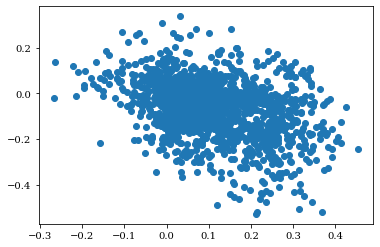

RONA-temp_opt adaptive all


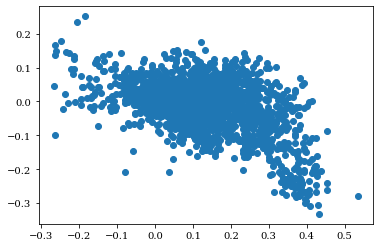

lfmm2 adaptive all


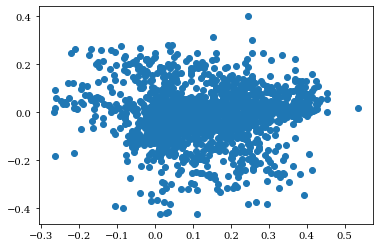

rda-nocorr adaptive all


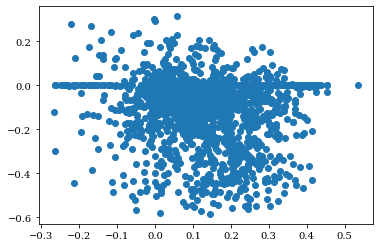

rda-structcorr adaptive all


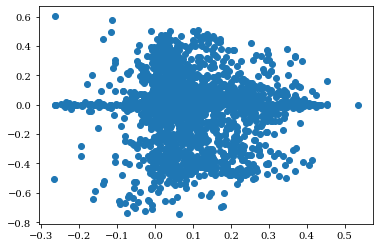

GF adaptive all


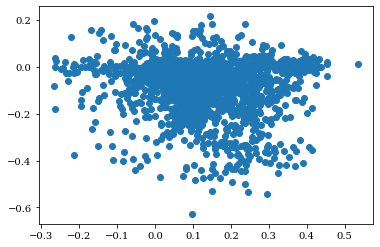

RONA-sal_opt adaptive neutral


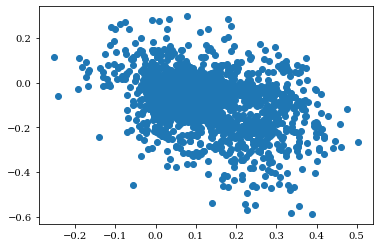

RONA-temp_opt adaptive neutral


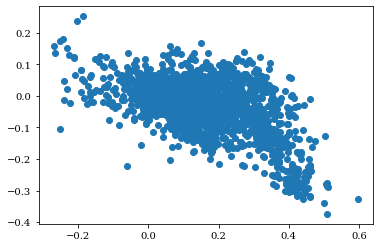

lfmm2 adaptive neutral


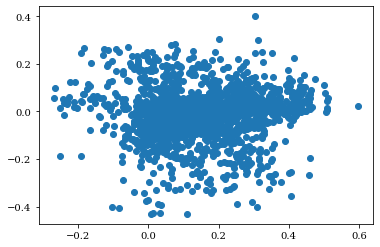

rda-nocorr adaptive neutral


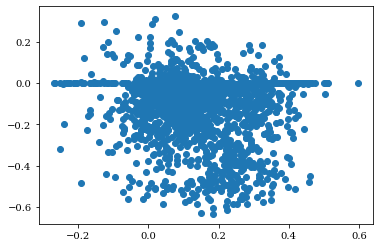

rda-structcorr adaptive neutral


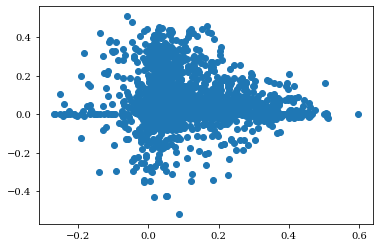

GF adaptive neutral


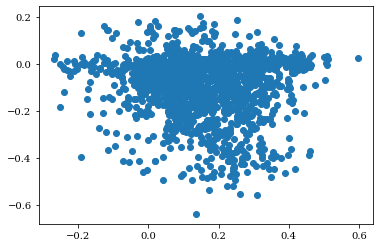

RONA-sal_opt all neutral


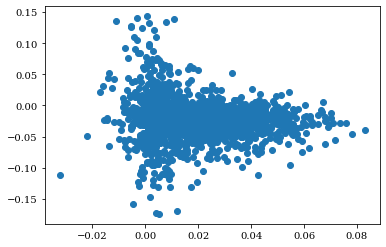

RONA-temp_opt all neutral


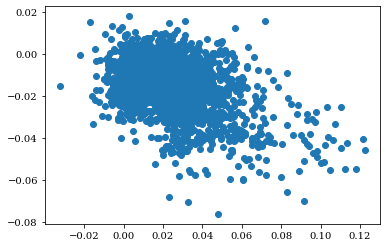

lfmm2 all neutral


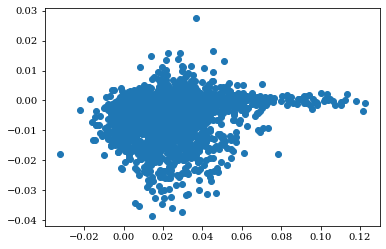

rda-nocorr all neutral


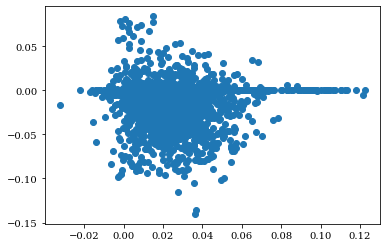

rda-structcorr all neutral


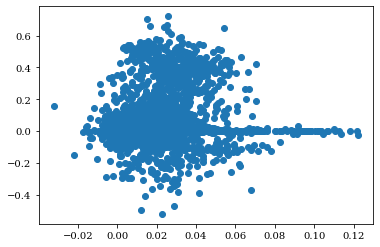

GF all neutral


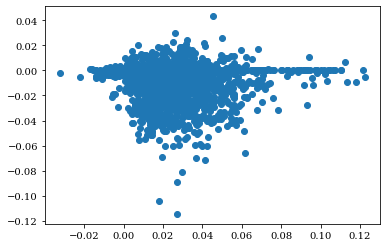

In [7]:
for marker_set_i, marker_set_j in it.combinations(mvp.hue_order['marker_set'], r=2):
    for program in mvp.hue_order['program']:
        print(program, marker_set_i, marker_set_j)
        
        perf_diff = marker_data[marker_set_i][program] - \
                    marker_data[marker_set_j][program]
        
        ibe_diff = ibe.loc[marker_set_i, 'value'].loc[perf_diff.index.astype(int)] - \
                   ibe.loc[marker_set_j, 'value'].loc[perf_diff.index.astype(int)]
        
        plt.scatter(ibe_diff, perf_diff)
                
#         scatter2d(ibe_diff, perf_diff, title=None, xlab='diff(ibe)', ylab='diff(performance)')
        
        plt.show()

### only 2-trait sims

In [8]:
params = mvp.read_params_file()

params.head()

100%|███████████████| 2250/2250 [00:02<00:00, 807.85it/s]


,level,reps,arch,demog_name,demog_level_sub,demog_level,MIG_x,MIG_y,xcline,ycline,demog,METAPOP_SIDE_x,METAPOP_SIDE_y,Nequal,isVariableM,MIG_breaks,arch_level_sub,arch_level,MU_base,MU_QTL_proportion,SIGMA_QTN_1,SIGMA_QTN_2,SIGMA_K_1,SIGMA_K_2,N_traits,ispleiotropy,seed,final_LA,glevel,plevel,pleio,slevel,landscape,popsize,migration,landscape-slevel
1231094,highly-polygenic_1-trait__Est-Clines_N-cline-c...,1,highly-polygenic_1-trait,Est-Clines_N-cline-center-to-edge_m-constant,N-cline-center-to-edge_m-constant,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,4,0,0,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231094,0.500854,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-center-to-edge,m-constant,Est-Clines_1-trait
1231095,highly-polygenic_1-trait__Est-Clines_N-cline-N...,1,highly-polygenic_1-trait,Est-Clines_N-cline-N-to-S_m-constant,N-cline-N-to-S_m-constant,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,2,0,0,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231095,0.505075,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,Est-Clines_1-trait
1231096,highly-polygenic_1-trait__Est-Clines_N-equal_m...,1,highly-polygenic_1-trait,Est-Clines_N-equal_m_breaks,N-equal_m_breaks,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,0,0,1,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231096,0.499265,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-equal,m-breaks,Est-Clines_1-trait
1231097,highly-polygenic_1-trait__Est-Clines_N-equal_m...,1,highly-polygenic_1-trait,Est-Clines_N-equal_m-constant,N-equal_m-constant,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,0,0,0,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231097,0.499365,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-equal,m-constant,Est-Clines_1-trait
1231098,highly-polygenic_1-trait__Est-Clines_N-variabl...,1,highly-polygenic_1-trait,Est-Clines_N-variable_m-variable,N-variable_m-variable,Est-Clines,0.49,0.07,linear,linear,Estuary,10,10,3,1,0,1-trait,highly-polygenic,1.000000e-07,0.25,0.002,0.002,0.5,0.5,1,0,1231098,0.501054,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-variable,m-variable,Est-Clines_1-trait


In [9]:
two_trait_sims = params[params.plevel == '2-trait'].index.tolist()

two_trait_sims[:5]

['1231109', '1231110', '1231111', '1231112', '1231113']

RONA-sal_opt adaptive all


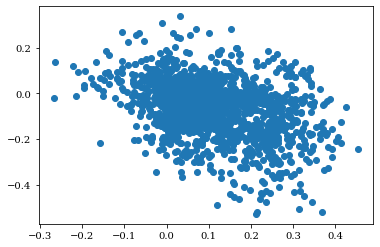

RONA-temp_opt adaptive all


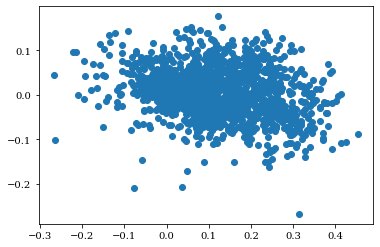

lfmm2 adaptive all


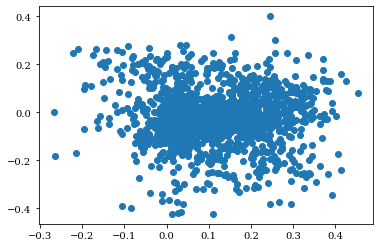

rda-nocorr adaptive all


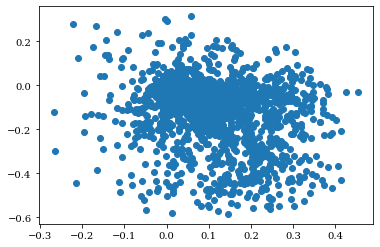

rda-structcorr adaptive all


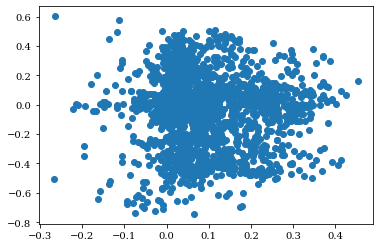

GF adaptive all


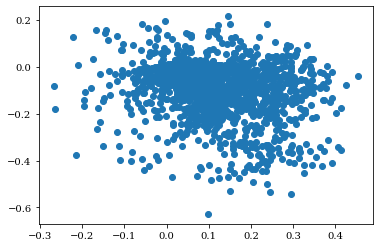

RONA-sal_opt adaptive neutral


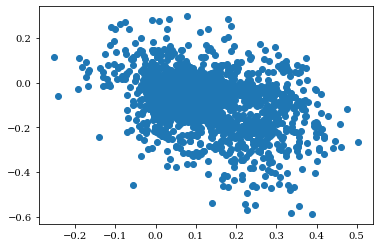

RONA-temp_opt adaptive neutral


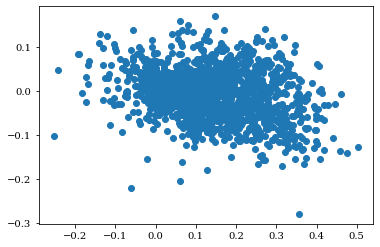

lfmm2 adaptive neutral


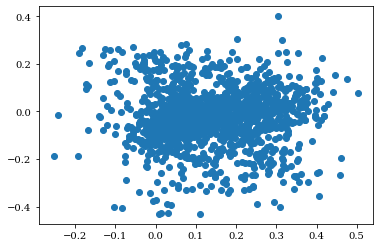

rda-nocorr adaptive neutral


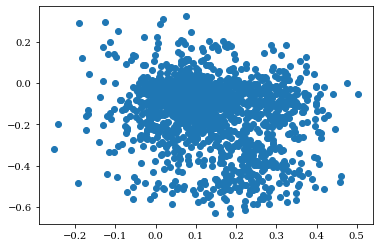

rda-structcorr adaptive neutral


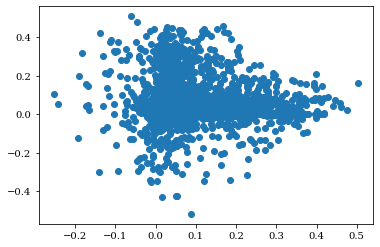

GF adaptive neutral


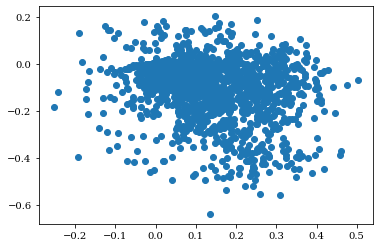

RONA-sal_opt all neutral


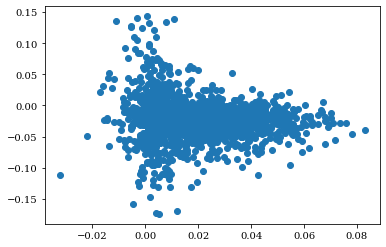

RONA-temp_opt all neutral


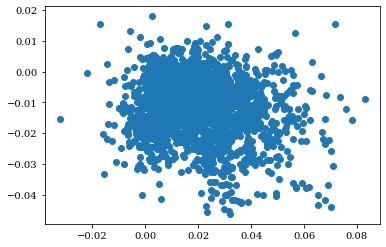

lfmm2 all neutral


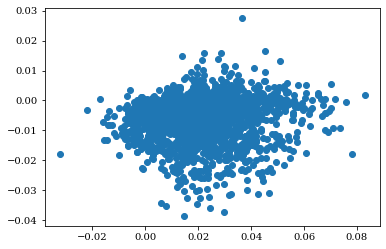

rda-nocorr all neutral


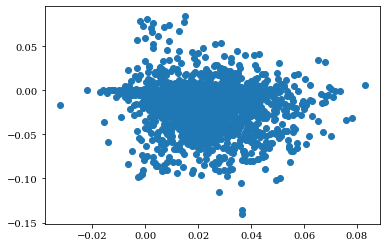

rda-structcorr all neutral


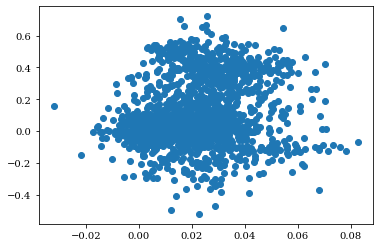

GF all neutral


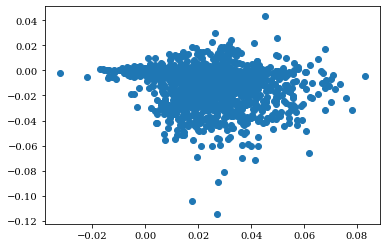

In [10]:
for marker_set_i, marker_set_j in it.combinations(mvp.hue_order['marker_set'], r=2):
    for program in mvp.hue_order['program']:
        print(program, marker_set_i, marker_set_j)

        perf_diff = marker_data[marker_set_i][program].loc[two_trait_sims] - \
                    marker_data[marker_set_j][program].loc[two_trait_sims]
        
        exp_diff = math.e ** perf_diff
        
        ibe_diff = ibe.loc[marker_set_i, 'value'].loc[perf_diff.index.astype(int)] - \
                   ibe.loc[marker_set_j, 'value'].loc[perf_diff.index.astype(int)]
        
        plt.scatter(ibe_diff, perf_diff)
            
#         scatter2d(ibe_diff, perf_diff, title=None, xlab='diff(ibe)', ylab='diff(performance)')
        
        plt.show()

# by levels

In [11]:
from myfigs import save_pdf

RONA-sal_opt adaptive all
Saved to:  /home/b.lind/offsets/run_20220919/summaries/02_main_questions/12_ibe_marker_set_diffs/adaptive_all_RONA-sal_opt_diff_ibe_vs_diff_performance.pdf


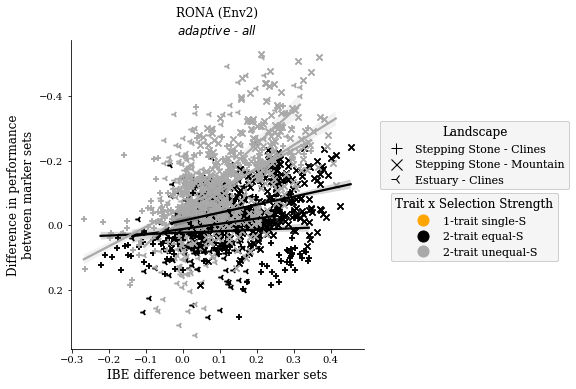

RONA-temp_opt adaptive all
Saved to:  /home/b.lind/offsets/run_20220919/summaries/02_main_questions/12_ibe_marker_set_diffs/adaptive_all_RONA-temp_opt_diff_ibe_vs_diff_performance.pdf


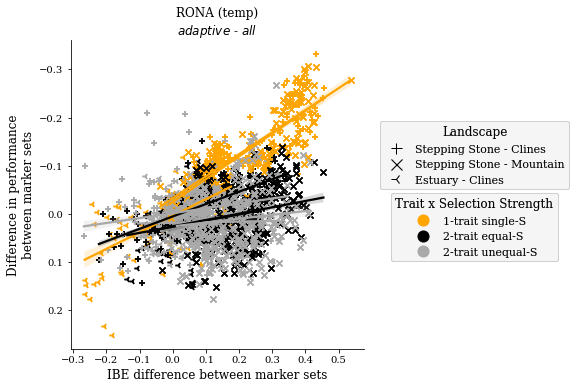

lfmm2 adaptive all
Saved to:  /home/b.lind/offsets/run_20220919/summaries/02_main_questions/12_ibe_marker_set_diffs/adaptive_all_lfmm2_diff_ibe_vs_diff_performance.pdf


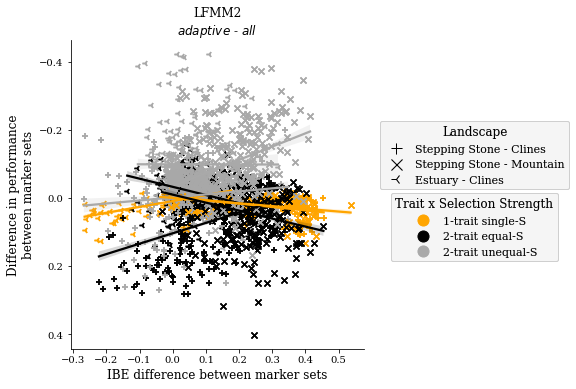

rda-nocorr adaptive all
Saved to:  /home/b.lind/offsets/run_20220919/summaries/02_main_questions/12_ibe_marker_set_diffs/adaptive_all_rda-nocorr_diff_ibe_vs_diff_performance.pdf


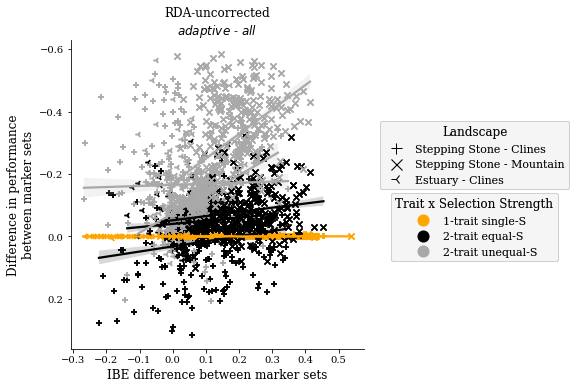

rda-structcorr adaptive all
Saved to:  /home/b.lind/offsets/run_20220919/summaries/02_main_questions/12_ibe_marker_set_diffs/adaptive_all_rda-structcorr_diff_ibe_vs_diff_performance.pdf


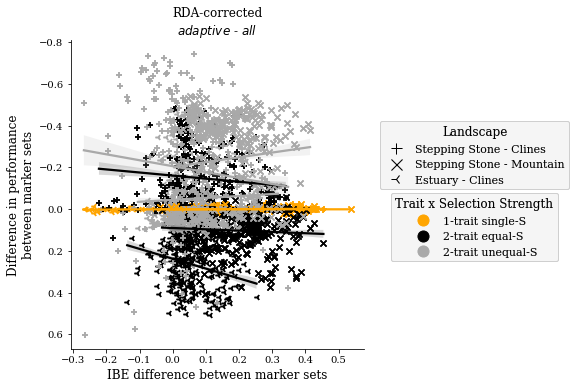

GF adaptive all
Saved to:  /home/b.lind/offsets/run_20220919/summaries/02_main_questions/12_ibe_marker_set_diffs/adaptive_all_GF_diff_ibe_vs_diff_performance.pdf


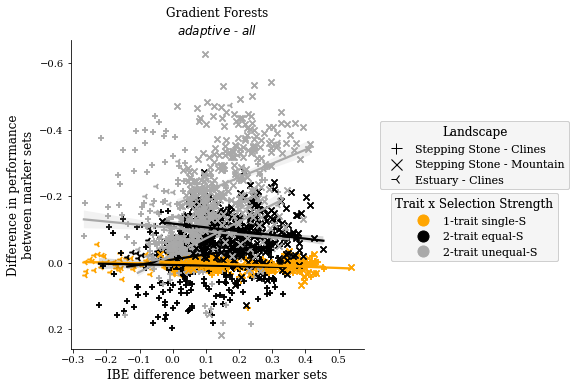

RONA-sal_opt adaptive neutral
Saved to:  /home/b.lind/offsets/run_20220919/summaries/02_main_questions/12_ibe_marker_set_diffs/adaptive_neutral_RONA-sal_opt_diff_ibe_vs_diff_performance.pdf


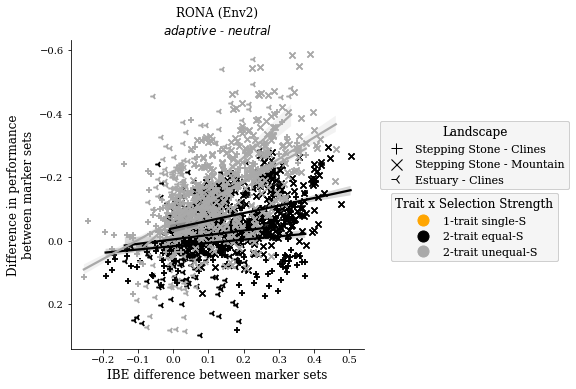

RONA-temp_opt adaptive neutral
Saved to:  /home/b.lind/offsets/run_20220919/summaries/02_main_questions/12_ibe_marker_set_diffs/adaptive_neutral_RONA-temp_opt_diff_ibe_vs_diff_performance.pdf


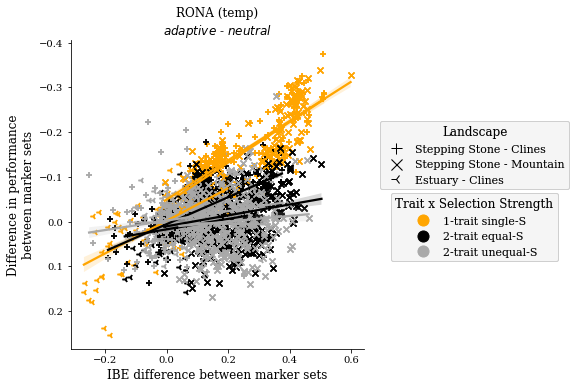

lfmm2 adaptive neutral
Saved to:  /home/b.lind/offsets/run_20220919/summaries/02_main_questions/12_ibe_marker_set_diffs/adaptive_neutral_lfmm2_diff_ibe_vs_diff_performance.pdf


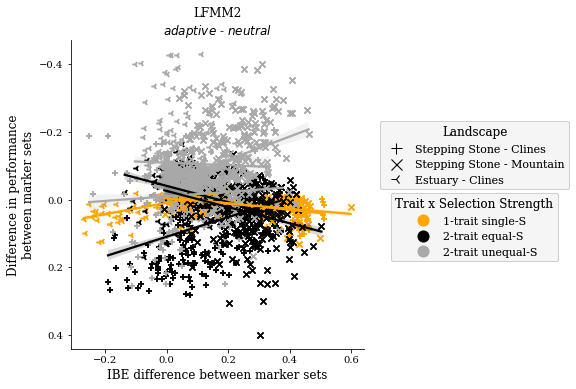

rda-nocorr adaptive neutral
Saved to:  /home/b.lind/offsets/run_20220919/summaries/02_main_questions/12_ibe_marker_set_diffs/adaptive_neutral_rda-nocorr_diff_ibe_vs_diff_performance.pdf


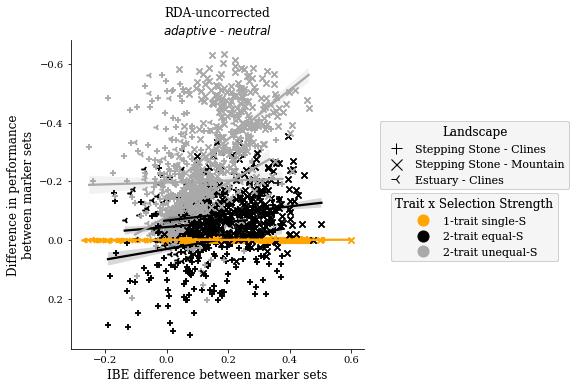

rda-structcorr adaptive neutral
Saved to:  /home/b.lind/offsets/run_20220919/summaries/02_main_questions/12_ibe_marker_set_diffs/adaptive_neutral_rda-structcorr_diff_ibe_vs_diff_performance.pdf


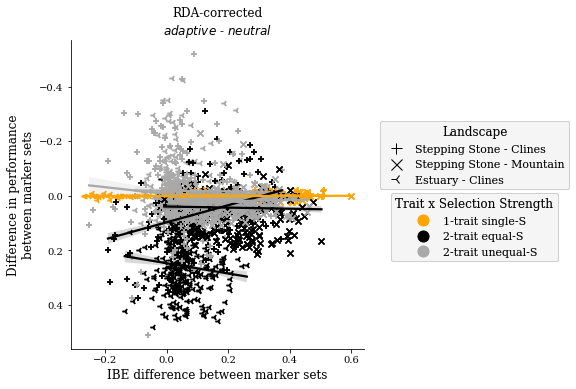

GF adaptive neutral
Saved to:  /home/b.lind/offsets/run_20220919/summaries/02_main_questions/12_ibe_marker_set_diffs/adaptive_neutral_GF_diff_ibe_vs_diff_performance.pdf


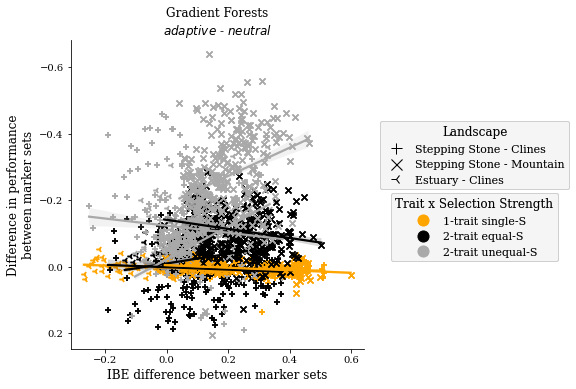

RONA-sal_opt all neutral
Saved to:  /home/b.lind/offsets/run_20220919/summaries/02_main_questions/12_ibe_marker_set_diffs/all_neutral_RONA-sal_opt_diff_ibe_vs_diff_performance.pdf


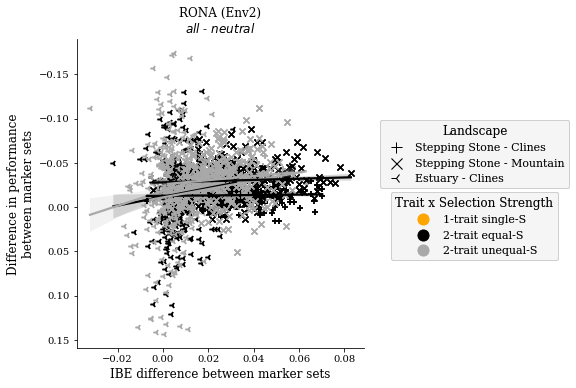

RONA-temp_opt all neutral
Saved to:  /home/b.lind/offsets/run_20220919/summaries/02_main_questions/12_ibe_marker_set_diffs/all_neutral_RONA-temp_opt_diff_ibe_vs_diff_performance.pdf


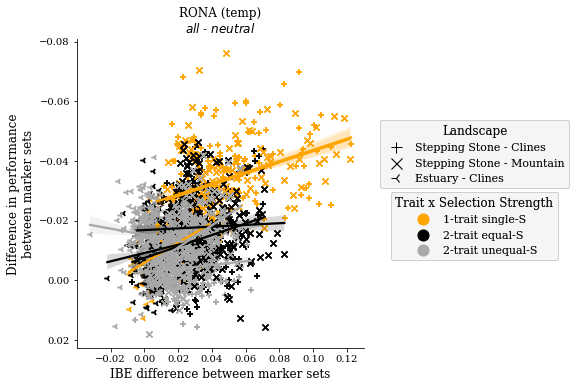

lfmm2 all neutral
Saved to:  /home/b.lind/offsets/run_20220919/summaries/02_main_questions/12_ibe_marker_set_diffs/all_neutral_lfmm2_diff_ibe_vs_diff_performance.pdf


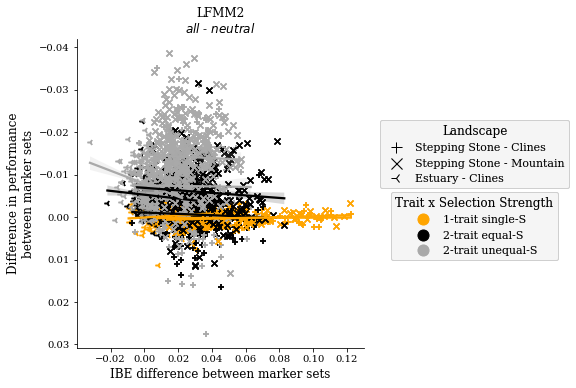

rda-nocorr all neutral
Saved to:  /home/b.lind/offsets/run_20220919/summaries/02_main_questions/12_ibe_marker_set_diffs/all_neutral_rda-nocorr_diff_ibe_vs_diff_performance.pdf


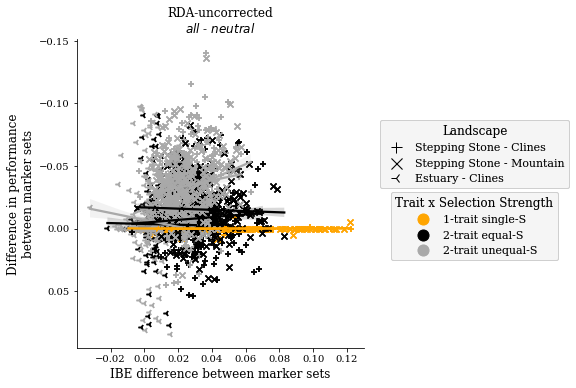

rda-structcorr all neutral
Saved to:  /home/b.lind/offsets/run_20220919/summaries/02_main_questions/12_ibe_marker_set_diffs/all_neutral_rda-structcorr_diff_ibe_vs_diff_performance.pdf


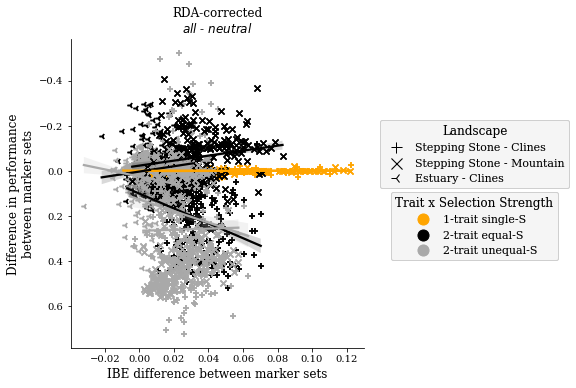

GF all neutral
Saved to:  /home/b.lind/offsets/run_20220919/summaries/02_main_questions/12_ibe_marker_set_diffs/all_neutral_GF_diff_ibe_vs_diff_performance.pdf


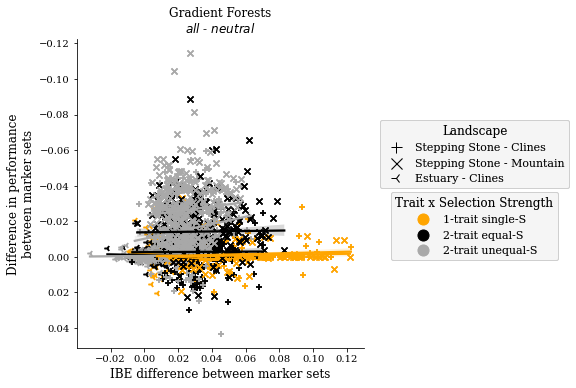

In [12]:
for marker_set_i, marker_set_j in it.combinations(mvp.hue_order['marker_set'], r=2):
    for program in mvp.hue_order['program']:
#         if 'RONA' in program:
#             continue
        
        print(program, marker_set_i, marker_set_j)
        
        perf_diff = marker_data[marker_set_i][program] - \
                    marker_data[marker_set_j][program]
        
        ibe_diff = ibe.loc[marker_set_i, 'value'].loc[perf_diff.index.astype(int)] - \
                   ibe.loc[marker_set_j, 'value'].loc[perf_diff.index.astype(int)]
        
        lmdata = ibe_anno.copy()
        lmdata['perf_diff'] = ibe_anno['index'].astype(str).map(perf_diff)
        lmdata['ibe_diff'] = ibe_anno['index'].astype(int).map(ibe_diff)
        
        g = sns.lmplot(
            data=lmdata,
            x='ibe_diff',
            y='perf_diff',
            hue='landscape-slevel',
            hue_order=sorted(ibe_anno['landscape-slevel'].unique()),
            palette=mvp.boxplot_kwargs['palette'],
            markers=pd.Series(sorted(ibe_anno['landscape-slevel'].unique())).map(mvp.markers).tolist(),
            legend=False
        )
        
        g.ax.set_xlabel('IBE difference between marker sets', fontsize=12)
        g.ax.set_ylabel('Difference in performance\nbetween marker sets', fontsize=12)
        g.ax.set_title(f'{mvp.factor_names[program]}\n$\it{marker_set_i}$ - $\it{marker_set_j}$')
        g.ax.invert_yaxis()
        
        
        mvp.add_legend(g.figure, color_by='landscape', loc='center left', bbox_to_anchor=(1, 0.65),
                       use_markers=True, markeredgecolor='k')
        mvp.add_legend(g.figure, color_by='slevel_plus1', loc='center left', bbox_to_anchor=(1.03, 0.45))
        
        save_pdf(f'{figdir}/{marker_set_i}_{marker_set_j}_{program}_diff_ibe_vs_diff_performance.pdf')
        
        plt.show()
        

In [13]:
formatclock(dt.now() - t0)

'0-00:01:24'

### what about models above certain performance thresholds?

maybe ibe only matters some times